<a href="https://colab.research.google.com/github/greatsong/2019deeplearning/blob/master/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%88%98%EC%97%85_3%EC%9D%BC%EC%B0%A8_191126_mnist%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 86.3MB 26kB/s 
     |████████████████████████████████| 3.8MB 3.3MB/s 
     |████████████████████████████████| 450kB 8.0MB/s 
     |████████████████████████████████| 81kB 4.1MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled t

In [0]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [0]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(keras.__version__)

2.2.4-tf


In [0]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [0]:
(X_train, Y_train), (X_validation, Y_validation) = mnist.load_data()

In [0]:
# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [0]:
for x in X_train[0]:
  for i in x:
    print('{:3} '.format(i), end='')
  print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [0]:
print(Y_train[0])

5


In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])

In [0]:
X_train.shape

(60000, 784)

In [0]:
# 원 핫 인코딩

Y_train = keras.backend.one_hot(Y_train, 10)

In [0]:
Y_train[0]

<tf.Tensor: id=578, shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)>

In [0]:
Y_validation = keras.backend.one_hot(Y_validation, 10)

In [0]:
from keras.models import Sequential
from keras.layers import Dense

model = keras.models.Sequential()

Using TensorFlow backend.


In [0]:
model

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='sgd',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train)
model.evaluate(X_validation, Y_validation)

Train on 60000 samples
60000/60000 [==============================] - 5s 82us/sample - loss: 58.7647 - accuracy: 0.1114
10000/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.3008135215759276, 0.1136]

In [0]:
X_train, X_validation = X_train / 255.0, X_validation / 255.0

In [0]:
model.fit(X_train, Y_train)
model.evaluate(X_validation, Y_validation)

Train on 60000 samples
60000/60000 [==============================] - 5s 77us/sample - loss: 2.3013 - accuracy: 0.1124
10000/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.3009978000640867, 0.1135]

In [0]:
model.fit(X_train, Y_train, epochs=5)
model.evaluate(X_validation, Y_validation)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 76us/sample - loss: 2.3013 - accuracy: 0.1124
Epoch 2/5
60000/60000 [==============================] - 5s 76us/sample - loss: 2.3013 - accuracy: 0.1124
Epoch 3/5
60000/60000 [==============================] - 5s 76us/sample - loss: 2.3013 - accuracy: 0.1124
Epoch 4/5
60000/60000 [==============================] - 5s 77us/sample - loss: 2.3012 - accuracy: 0.1124
Epoch 5/5
60000/60000 [==============================] - 5s 79us/sample - loss: 2.3013 - accuracy: 0.1124
10000/1 [======================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.3010385009765626, 0.1135]

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train)
model.evaluate(X_validation, Y_validation)

Train on 60000 samples
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2426 - accuracy: 0.9295
10000/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.12659075363837183, 0.9615]

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(X_train, Y_train), (X_validation, Y_validation) = mnist.load_data()

# normalize
X_train, X_validation = X_train / 255.0, X_validation / 255.0
# 원 핫 인코딩
Y_train = keras.backend.one_hot(Y_train, 10)
Y_validation = keras.backend.one_hot(Y_validation, 10)

from keras.models import Sequential
from keras.layers import Dense

model = keras.models.Sequential()
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train)
model.evaluate(X_validation, Y_validation)

Train on 60000 samples
60000/60000 [==============================] - 5s 82us/sample - loss: 0.6270 - accuracy: 0.8308
10000/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.32118716874718667, 0.907]

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(X_train, Y_train), (X_validation, Y_validation) = mnist.load_data()

# 원 핫 인코딩
X_train, X_validation = X_train / 255.0, X_validation / 255.0

Y_train = keras.backend.one_hot(Y_train, 10)
Y_validation = keras.backend.one_hot(Y_validation, 10)

from keras.models import Sequential
from keras.layers import Dense

model = keras.models.Sequential()
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train)
model.evaluate(X_validation, Y_validation)

Train on 60000 samples
60000/60000 [==============================] - 5s 84us/sample - loss: 0.7255 - accuracy: 0.7918
10000/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3193746954977512, 0.9129]

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(X_train, Y_train), (X_validation, Y_validation) = mnist.load_data()

# 원 핫 인코딩
X_train, X_validation = X_train / 255.0, X_validation / 255.0

Y_train = keras.backend.one_hot(Y_train, 10)
Y_validation = keras.backend.one_hot(Y_validation, 10)

from keras.models import Sequential
from keras.layers import Dense

model = keras.models.Sequential()
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  # 레이어 추가
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train)
model.evaluate(X_validation, Y_validation)

Train on 60000 samples
60000/60000 [==============================] - 7s 120us/sample - loss: 0.6269 - accuracy: 0.8264
10000/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.2850342377632856, 0.9184]

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(X_train, Y_train), (X_validation, Y_validation) = mnist.load_data()

# 원 핫 인코딩
X_train, X_validation = X_train / 255.0, X_validation / 255.0

Y_train = keras.backend.one_hot(Y_train, 10)
Y_validation = keras.backend.one_hot(Y_validation, 10)

from keras.models import Sequential
from keras.layers import Dense

model = keras.models.Sequential()
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
# adam으로 교체
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train)
model.evaluate(X_validation, Y_validation)

Train on 60000 samples
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2133 - accuracy: 0.9365
10000/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.13381226183399558, 0.9577]

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(X_train, Y_train), (X_validation, Y_validation) = mnist.load_data()

# 원 핫 인코딩
X_train, X_validation = X_train / 255.0, X_validation / 255.0

Y_train = keras.backend.one_hot(Y_train, 10)
Y_validation = keras.backend.one_hot(Y_validation, 10)

from keras.models import Sequential
from keras.layers import Dense

model = keras.models.Sequential()
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train)
model.evaluate(X_validation, Y_validation)

Train on 60000 samples
60000/60000 [==============================] - 8s 129us/sample - loss: 0.2114 - accuracy: 0.9365
10000/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.09664245981061831, 0.969]

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(X_train, Y_train), (X_validation, Y_validation) = mnist.load_data()

# 원 핫 인코딩
X_train, X_validation = X_train / 255.0, X_validation / 255.0

Y_train = keras.backend.one_hot(Y_train, 10)
Y_validation = keras.backend.one_hot(Y_validation, 10)

from keras.models import Sequential
from keras.layers import Dense

model = keras.models.Sequential()
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train)
model.evaluate(X_validation, Y_validation)

Train on 60000 samples
60000/60000 [==============================] - 8s 134us/sample - loss: 0.2398 - accuracy: 0.9287
10000/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.1111753328602761, 0.9656]

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(X_train, Y_train), (X_validation, Y_validation) = mnist.load_data()

# 원 핫 인코딩
X_train, X_validation = X_train / 255.0, X_validation / 255.0

Y_train = keras.backend.one_hot(Y_train, 10)
Y_validation = keras.backend.one_hot(Y_validation, 10)

from keras.models import Sequential
from keras.layers import Dense

model = keras.models.Sequential()
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# rmsprop 교체
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train)
model.evaluate(X_validation, Y_validation)

Train on 60000 samples
60000/60000 [==============================] - 11s 182us/sample - loss: 0.2482 - accuracy: 0.9267
10000/1 [======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.11638683978579939, 0.9662]

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
mnist = keras.datasets.mnist
(X_train, Y_train), (X_validation, Y_validation) = mnist.load_data()
X_train, X_validation = X_train / 255.0, X_validation / 255.0

from keras.models import Sequential
from keras.layers import Dense

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  #tf.keras.layers.Dense(256, activation='relu'),
  #tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(8, activation='relu'),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# rmsprop 교체
model.compile(optimizer='rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
model.fit(X_train, Y_train)
model.evaluate(X_validation, Y_validation)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
60000/60000 [==============================] - 4s 67us/sample - loss: 0.6566 - accuracy: 0.8093
10000/1 [==============================================================================================================================================================================================================================================================

[0.3556177604019642, 0.9016]

In [0]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=20)

model.evaluate(x_test,  y_test, verbose=2)


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2574 - accuracy: 0.9271 - val_loss: 0.1332 - val_accuracy: 0.9601
Epoch 2/20
60000/60000 [==============================] - 6s 98us/sample - loss: 0.1099 - accuracy: 0.9673 - val_loss: 0.0954 - val_accuracy: 0.9704
Epoch 3/20
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0753 - accuracy: 0.9770 - val_loss: 0.0784 - val_accuracy: 0.9754
Epoch 4/20
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0577 - accuracy: 0.9822 - val_loss: 0.0733 - val_accuracy: 0.9772
Epoch 5/20
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0434 - accuracy: 0.9868 - val_loss: 0.0769 - val_accuracy: 0.9774
Epoch 6/20
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0342 - accuracy: 0.9895 - val_loss: 0.0782 - val_accuracy: 0.9772
Epoch 7/20
60000/60000 [==============================

[0.0951752253099697, 0.979]

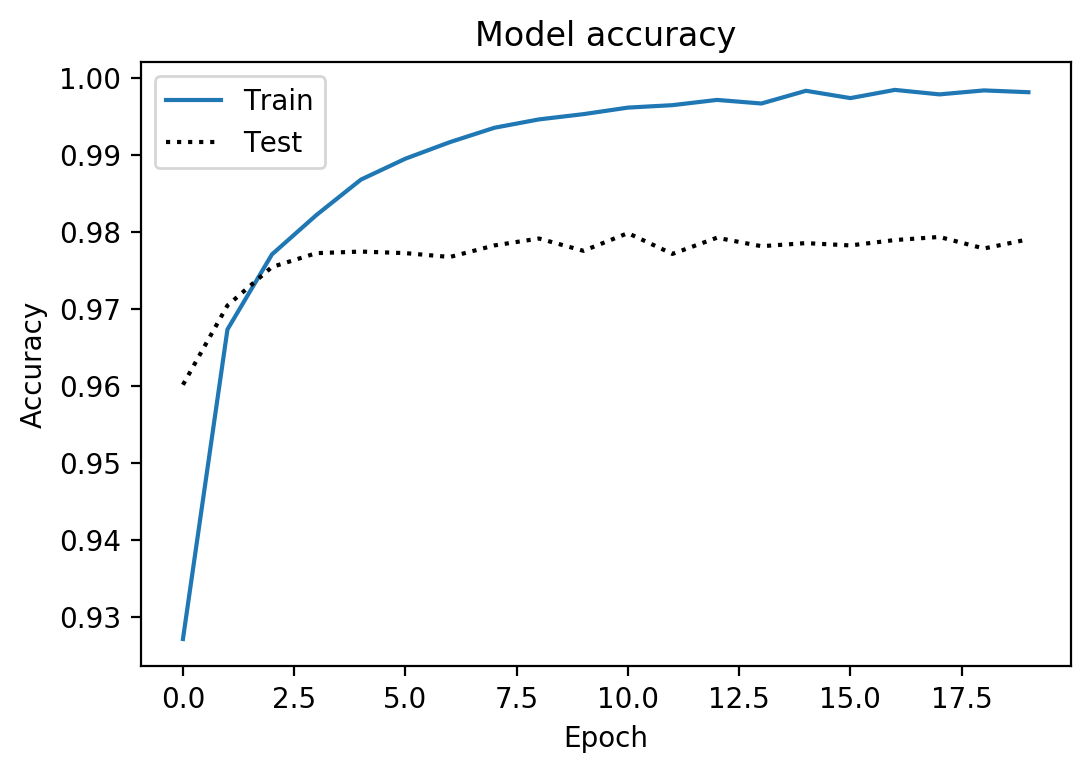

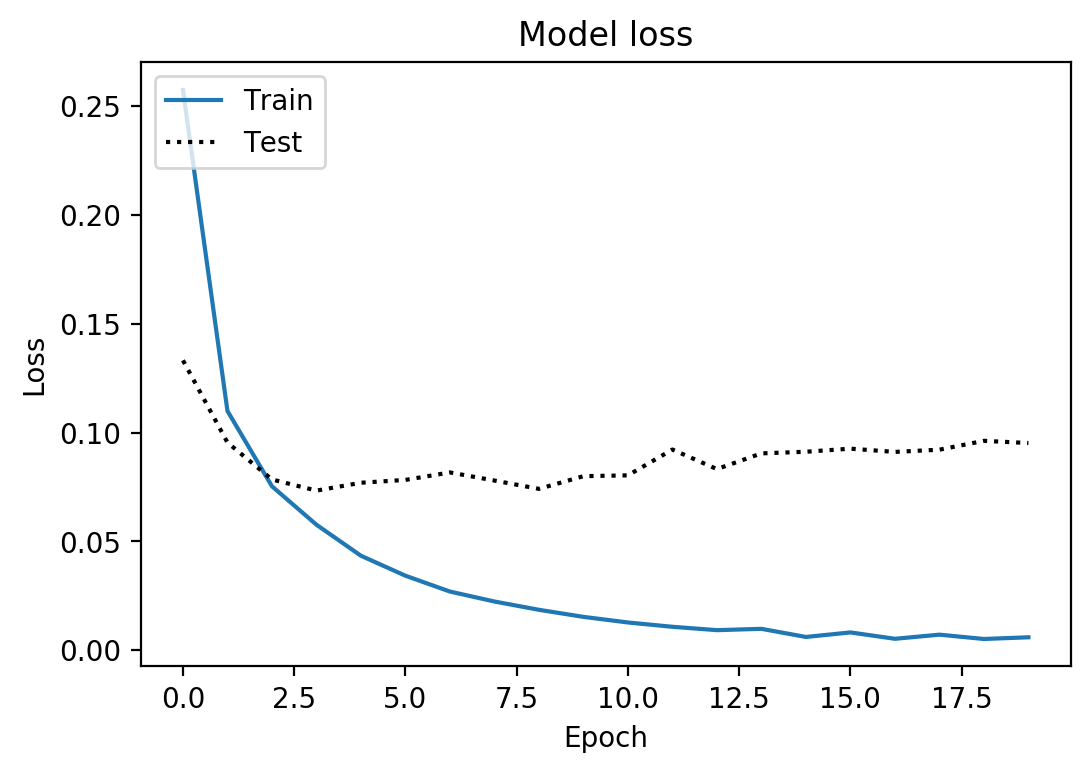

In [0]:
plt.figure(dpi=200)
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], 'k:')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.figure(dpi=200)
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'k:')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()